In [28]:
import os
import pandas as pd           # Handle tabular survey data (DataFrame-based pipeline)
import numpy as np           # Load trained machine learning models from disk

from joblib import load


In [29]:
def compute_ai_governance_vision(
    df,
    # DataFrame containing the survey responses

    items=("VUTAI1", "VUTAI2", "VUTAI3"),
    # Survey items used to measure AI governance vision

    method="mean",
    # Method used to compute the score (mean of the items),
    # kept for conceptual clarity even if only one method is currently used

    score_col="AI_Governance_Vision",
    # Name of the column that will store the raw AI governance vision score

    pct_col="AI_Governance_Vision_Pct",
    # Name of the column that will store the percentage score

    scale_min=1,
    # Minimum value of the Likert scale used in the questionnaire

    scale_max=4
    # Maximum value of the Likert scale used in the questionnaire
):
    # -------------------------------------------------
    # Step 1: Compute the raw AI governance vision score
    # -------------------------------------------------

    # Compute the row-wise mean of the VUTAI items
    # Each row corresponds to one institution or respondent
    score = df[list(items)].mean(axis=1)

    # Store the raw score in the DataFrame
    df[score_col] = score

    # -------------------------------------------------
    # Step 2: Convert the raw score into a percentage
    # -------------------------------------------------

    # Transform the raw score into a 0–100 percentage
    # This makes the result easier to interpret and compare
    df[pct_col] = ((score - scale_min) / (scale_max - scale_min)) * 100

    # Return the DataFrame with the computed scores
    return df


def interpret_vision_pct(pct):
    # This function converts a percentage score
    # into a qualitative interpretation

    # If the score is below 33%, AI governance vision is low
    if pct < 33:
        return "Low AI Governance Vision"

    # If the score is between 33% and 66%, vision is moderate
    elif pct < 66:
        return "Moderate AI Governance Vision"

    # If the score is 66% or higher, vision is high
    else:
        return "High AI Governance Vision"


In [35]:
# ============================================================
# Feature configuration for ML-based AI governance prediction
# ============================================================

FEATURE_ORDER = [
    "EST1", "EST3", "EST4",
    "OUAI2", "OUAI3", "OUAI4",
    "PBUG1", "PBUG2", "PBUG3", "PBUG4"
]
# Ordered list of input features used by the trained ML models.
# IMPORTANT: The order must be exactly the same as during training,
# otherwise, the predictions will be incorrect.
# ============================================================
# Required libraries for model loading and file handling
# ============================================================

import os
from joblib import load

# Model storage configuration
MODEL_DIR = "Models"
# Path to the directory where trained ML models are stored
loaded_models = {}

# We only care about predicting the three vision items
VISION_TARGETS = ["VUTAI1", "VUTAI2", "VUTAI3"]

for target in VISION_TARGETS:

    # Find the saved model file for this target
    matching_files = [
        f for f in os.listdir(MODEL_DIR)
        if f.startswith(f"ML_BestModel_VUTAI_{target}_") and f.endswith(".joblib")
    ]

    if len(matching_files) == 0:
        raise FileNotFoundError(f"No saved best model found for {target}")

    if len(matching_files) > 1:
        raise ValueError(f"Multiple models found for {target}: {matching_files}")

    model_file = matching_files[0]
    model_path = os.path.join(MODEL_DIR, model_file)

    # Load model
    loaded_models[target] = {
        "model": load(model_path),
        "features": FEATURE_ORDER
    }
    
# Confirmation message to ensure correct model loading
    
    print(f"Loaded best model for {target}: {model_file}")


Loaded best model for VUTAI1: ML_BestModel_VUTAI_VUTAI1_RidgeRegression.joblib
Loaded best model for VUTAI2: ML_BestModel_VUTAI_VUTAI2_RandomForest.joblib
Loaded best model for VUTAI3: ML_BestModel_VUTAI_VUTAI3_RandomForest.joblib


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results

In [31]:
FEATURE_ORDER = [
    "EST1", "EST3", "EST4",
    "OUAI2", "OUAI3", "OUAI4",
    "PBUG1", "PBUG2", "PBUG3", "PBUG4"
]


import os
from joblib import load

MODEL_DIR = "Models"

loaded_models = {}

# We only care about predicting the three vision items
VISION_TARGETS = ["VUTAI1", "VUTAI2", "VUTAI3"]

for target in VISION_TARGETS:

    # Find the saved model file for this target
    matching_files = [
        f for f in os.listdir(MODEL_DIR)
        if f.startswith(f"ML_BestModel_VUTAI_{target}_") and f.endswith(".joblib")
    ]

    if len(matching_files) == 0:
        raise FileNotFoundError(f"No saved best model found for {target}")

    if len(matching_files) > 1:
        raise ValueError(f"Multiple models found for {target}: {matching_files}")

    model_file = matching_files[0]
    model_path = os.path.join(MODEL_DIR, model_file)

    # Load model
    loaded_models[target] = {
        "model": load(model_path),
        "features": FEATURE_ORDER
    }

    print(f"Loaded best model for {target}: {model_file}")


Loaded best model for VUTAI1: ML_BestModel_VUTAI_VUTAI1_RidgeRegression.joblib
Loaded best model for VUTAI2: ML_BestModel_VUTAI_VUTAI2_RandomForest.joblib
Loaded best model for VUTAI3: ML_BestModel_VUTAI_VUTAI3_RandomForest.joblib


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Ridge from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:442: InconsistentVersionWarning: Trying to unpickle estimator Pipeline from version 1.5.1 when using version 1.7.2. This might lead to breaking code or invalid results

In [32]:
#calculate the vision score of M5 University

In [36]:
import numpy as np  # Used for numerical operations if needed later in the pipeline
import pandas as pd  # Used to load and manipulate tabular data (DataFrame structure)

# Load data
df = pd.read_excel("last_data.xlsx")

# Drop empty Excel artifact columns
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]

# Sanity check
print(df.shape) 
# Print the dataset dimensions (number of rows and columns)
print(df.columns.tolist())
# Print the list of column names to verify correct data loading

(78, 13)
['PBUG1', 'PBUG2', 'PBUG3', 'PBUG4', 'OUAI2', 'OUAI3', 'OUAI4', 'EST1', 'EST3', 'EST4', 'VUTAI1', 'VUTAI2', 'VUTAI3']


In [37]:
# Compute Vision score and percentage on training data
df = compute_ai_governance_vision(
    df,
    # Input DataFrame containing the survey responses
    items=("VUTAI1", "VUTAI2", "VUTAI3"),
    
     # Survey items used to compute the AI governance vision score
    score_col="AI_Governance_Vision",
    
    # Column name for the computed raw vision score
    pct_col="AI_Governance_Vision_Pct",
      # Column name for the computed percentage score
    
    scale_min=1,
     # Minimum value of the Likert scale
    
    scale_max=4
     # Minimum value of the Likert scale
)


In [38]:
# Compute summary statistics for AI governance vision (raw score)

overall_vision_mean = df["AI_Governance_Vision"].mean()
# Compute the average AI governance vision score across all observationsoverall_vision_std = df["AI_Governance_Vision"].std()

overall_vision_std = df["AI_Governance_Vision"].std()
# Compute the standard deviation of the AI governance vision score

print(f"Overall AI Governance Vision (mean): {overall_vision_mean:.3f}")
# Display the mean raw vision score with three decimal precision
print(f"Standard deviation: {overall_vision_std:.3f}")
# Display the standard deviation of the raw vision score

Overall AI Governance Vision (mean): 3.474
Standard deviation: 0.695


In [39]:
# Compute summary statistics for AI governance vision (percentage score)

overall_vision_pct_mean = df["AI_Governance_Vision_Pct"].mean()
# Compute the average AI governance vision percentage score

overall_vision_pct_std = df["AI_Governance_Vision_Pct"].std()
# Compute the standard deviation of the AI governance vision percentage score

print(f"Overall AI Governance Vision (%): {overall_vision_pct_mean:.1f}%")
# Display the mean percentage score (rounded to one decimal)

print(f"Standard deviation (%): {overall_vision_pct_std:.1f}%")
# Display the standard deviation of the percentage score

Overall AI Governance Vision (%): 82.5%
Standard deviation (%): 23.2%


In [40]:
# Create a summary table for AI governance vision

# List of reported metrics included in the summary table
vision_summary = pd.DataFrame({
    "Metric": [
        "Mean Vision Score (1–4)",
        "Std Vision Score (1–4)",
        "Mean Vision (%)",
        "Std Vision (%)"
    ],
    # Corresponding numerical values for each metric
    "Value": [
        overall_vision_mean,
        overall_vision_std,
        overall_vision_pct_mean,
        overall_vision_pct_std
    ]
})
# Display the summary table
vision_summary


,Metric,Value
0,Mean Vision Score (1–4),3.474359
1,Std Vision Score (1–4),0.695314
2,Mean Vision (%),82.478632
3,Std Vision (%),23.177120


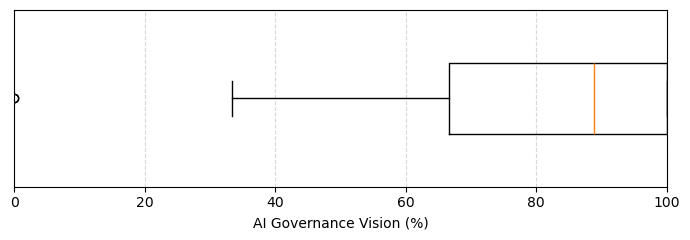

In [41]:
# Create a figure with a controlled aspect ratio

import matplotlib.pyplot as plt

# Vision percentage values
vision_pct = df["AI_Governance_Vision_Pct"]

# Initialize the figure and axis with a compact horizontal layout
fig, ax = plt.subplots(figsize=(7, 2.5))

# Horizontal boxplot of AI governance vision (%)
ax.boxplot(
    vision_pct,
    vert=False,
    widths=0.4,
    patch_artist=False
)

# Use a horizontal orientation to emphasize score distribution
# Labels
ax.set_xlabel("AI Governance Vision (%)")

# Axis limits
ax.set_xlim(0, 100)

# Remove y-axis clutter
ax.set_yticks([])

# Grid
ax.grid(axis="x", linestyle="--", alpha=0.5)

# Tight layout
plt.tight_layout()

# ✅ SAVE AS VECTOR FORMATS
plt.savefig("Results/AI_Governance_Vision_Boxplot.svg", format="svg", bbox_inches="tight")
plt.savefig("Results/AI_Governance_Vision_Boxplot.pdf", format="pdf", bbox_inches="tight")

# Show (optional)
plt.show()


In [42]:
# Insert new input data for prediction

new_data = {
   # Perceived benefits of using AI in governance (PBUG items)
    "PBUG1": 3, "PBUG2": 3, "PBUG3": 4, "PBUG4": 5,
    # Organizational understanding of AI (OUAI items)
    "OUAI2": 4, "OUAI3": 4, "OUAI4": 5,
     # Ethical–strategic thinking related to AI (EST items)
    "EST1": 4, "EST3": 5, "EST4": 5
}
# Example input representing a new institution or decision-making unit

# Convert input data to DataFrame and align feature order
new_df = pd.DataFrame([new_data])
# Create a single-row DataFrame from the input dictionary
new_df = new_df[FEATURE_ORDER]
# Reorder columns to match the feature order used during model training

# Alternative: load new input data from a CSV file
# new_df = pd.read_csv("new_responses.csv")
# Uncomment this line to load multiple new observations from an external CSV file

# Generate predictions for each vision item


predictions = {}
# Dictionary that will store the predicted values for each target variable
for target, content in loaded_models.items():
     # Iterate over each target variable and its corresponding model
    model = content["model"]
# Retrieve the trained model for the current target
    X_new = new_df[FEATURE_ORDER]
    # Select the input features in the correct order
    y_pred = model.predict(X_new)
# Generate the prediction for the new input data
    predictions[target] = float(y_pred[0])
# Store the predicted value (converted to a standard Python float)




In [45]:
# Validate that the input features match the expected training features

expected = set(FEATURE_ORDER)
# Set of feature names expected by the trained models (training configuration)

actual = set(new_df.columns)
# Set of feature names currently available in the new input data

if expected != actual:
    # Stop execution if the feature set is not exactly the same
    # This prevents wrong predictions caused by missing or extra columns
    raise ValueError(f"Feature mismatch!\nExpected: {expected}\nGot: {actual}")


In [48]:
# Attach predicted target values to the input DataFrame


for k, v in predictions.items():
    # For each predicted target variable (VUTAI1, VUTAI2, VUTAI3),
    # add the predicted value as a new column in the DataFrame
    new_df[k] = v
    
    # Display the predicted vision items (sanity check)

new_df[["VUTAI1", "VUTAI2", "VUTAI3"]]
# Show predicted values for the three AI governance vision indicators


,VUTAI1,VUTAI2,VUTAI3
0,4.43954,3.773333,3.73


In [49]:
# Compute overall AI governance vision score and percentage from predictions

new_df = compute_ai_governance_vision(
    new_df,
    # Use the new dataset that now includes predicted VUTAI values
    
    items=("VUTAI1", "VUTAI2", "VUTAI3"),
    # Compute the vision score using the predicted vision items
    
    score_col="AI_Governance_Vision",
    # Store the computed raw score in this column
    
    pct_col="AI_Governance_Vision_Pct",
    # Store the computed percentage score in this column
    
    scale_min=1,
    # Minimum Likert scale value used for normalization
    scale_max=4
    # Maximum Likert scale value used for normalization
)


In [50]:
# Convert the percentage score into an interpretable vision level

new_df["Vision_Level"] = new_df["AI_Governance_Vision_Pct"].apply(
    interpret_vision_pct
)
# Create a qualitative label (Low / Moderate / High) based on the percentage score

In [51]:
# Create the final output table with prediction results

final_table = new_df[[
    "VUTAI1", "VUTAI2", "VUTAI3",
    # Predicted AI governance vision items
    "AI_Governance_Vision",
    # Computed overall AI governance vision score (raw scale)
    "AI_Governance_Vision_Pct",
    # Computed AI governance vision score expressed as a percentage
    "Vision_Level"
    # Qualitative interpretation of the vision score (Low / Moderate / High)
]]
# Display the final results table
final_table


,VUTAI1,VUTAI2,VUTAI3,AI_Governance_Vision,AI_Governance_Vision_Pct,Vision_Level
0,4.43954,3.773333,3.73,3.980958,99.36526,High AI Governance Vision
